In [1]:
#importing packages and identifying/importing csv file
import pandas as pd
import warnings
import statistics
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore')
medical=pd.read_csv('medical_clean.csv')

In [2]:
# profiling dataframe. No null values
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Begin identifying duplicates section

In [4]:
# identifying any duplicates
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# seeing full value count of duplicates: no duplicates in file
print(medical.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# looking into missing data
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

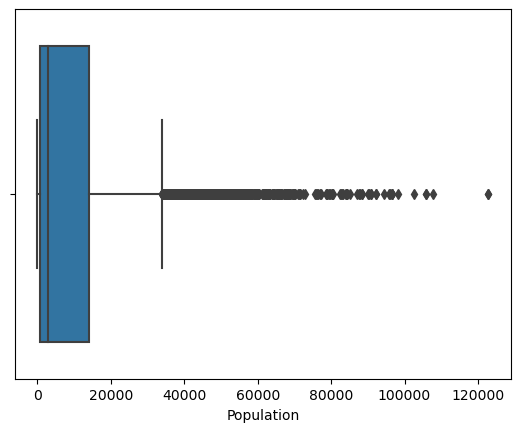

In [8]:
# look at boxplot of Population variable to identify outliers
boxplot=sns.boxplot(x='Population',data=medical)
# Outliers will be retained due to the large number of outliers and the expected diversity

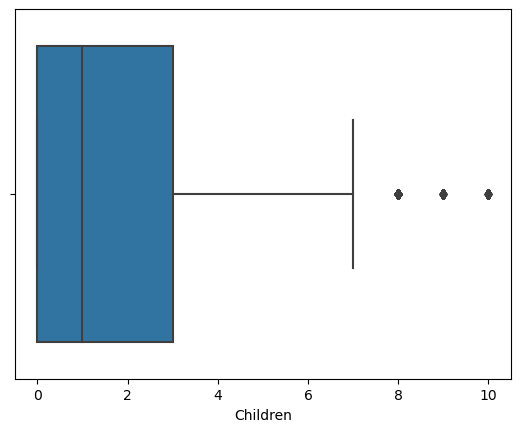

In [9]:
# look at boxplot of Children variable to identify outliers
boxplot=sns.boxplot(x='Children',data=medical) 
# outliers will be retained because these values are expected diversity

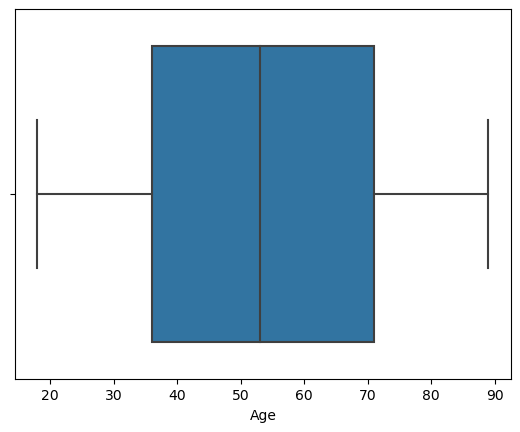

In [10]:
# look at boxplot of Age variable to identify outliers
boxplot=sns.boxplot(x='Age',data=medical) 
# no outliers

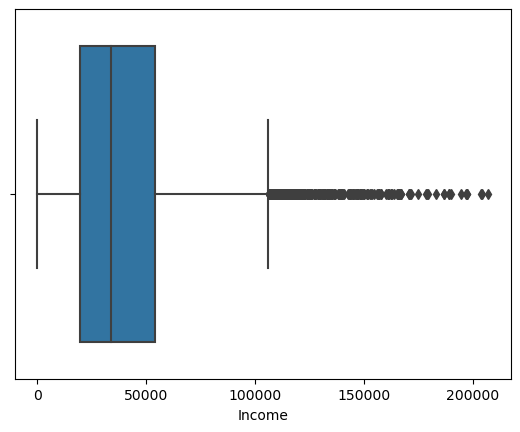

In [11]:
# look at boxplot of Income variable to identify outliers
boxplot=sns.boxplot(x='Income',data=medical) 
# Outliers will be retained because they add expected diversity

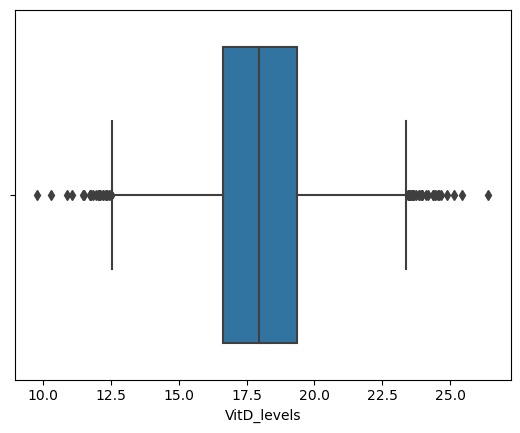

In [12]:
# look at boxplot of vit D levels variable to identify outliers
boxplot=sns.boxplot(x='VitD_levels',data=medical) 
# Outliers will be retained

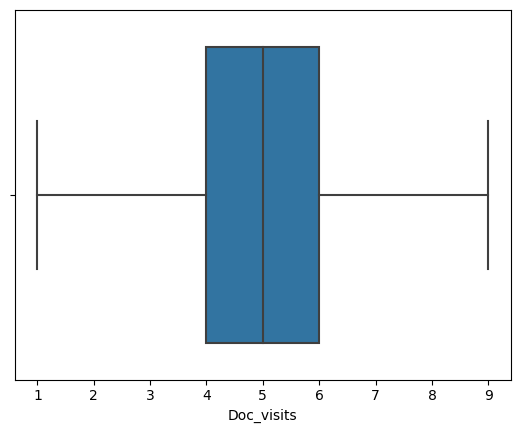

In [13]:
# look at boxplot of doc visits variable
boxplot=sns.boxplot(x='Doc_visits',data=medical) 
# no outliers

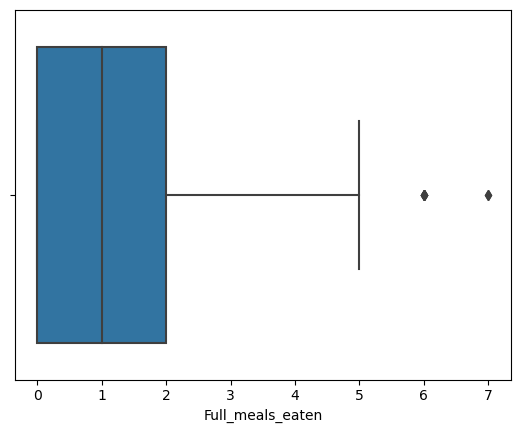

In [14]:
# look at boxplot of full meals eaten variable
boxplot=sns.boxplot(x='Full_meals_eaten',data=medical) 
# Outliers will be retained

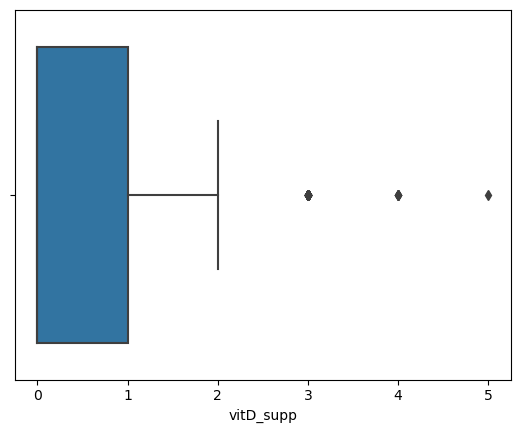

In [15]:
# look at boxplot of vit D supplement variable
boxplot=sns.boxplot(x='vitD_supp',data=medical)
# Outliers will be retained

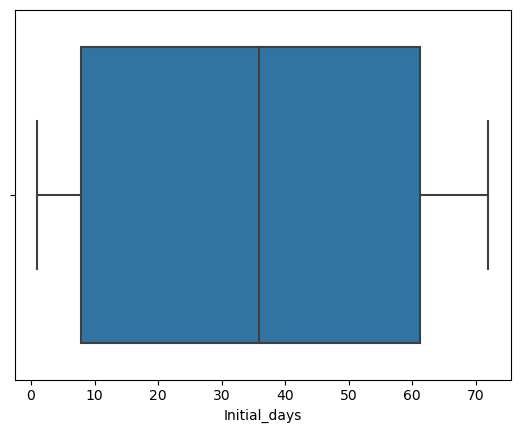

In [16]:
# look at boxplot of initial days variable
boxplot=sns.boxplot(x='Initial_days',data=medical)
# no outliers

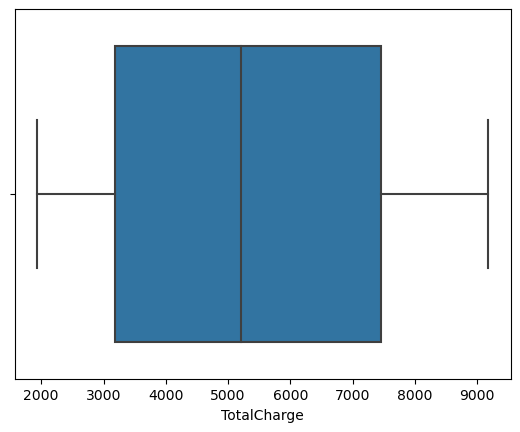

In [17]:
# look at boxplot of TotalCharge variable
boxplot=sns.boxplot(x='TotalCharge',data=medical)
# no outliers

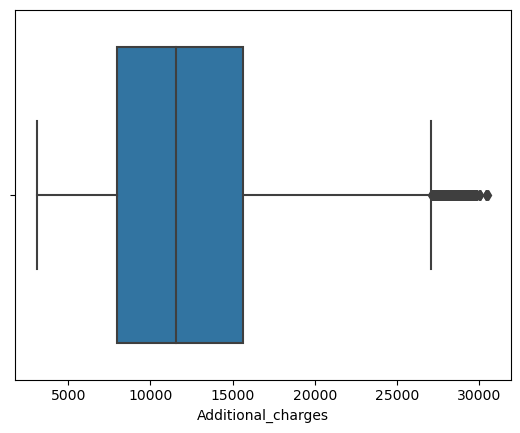

In [18]:
# look at boxplot of Additional_charges variable
boxplot=sns.boxplot(x='Additional_charges',data=medical)
# Outliers will be retained for expected diversity

Dataset contained no duplicates and no null values. No outliers were treated because all data seemed relevant in a medical context

Begin re-expression of variables section

In [19]:
# recode ReAdmis
medical['ReAdmis_recode']=medical['ReAdmis'].replace({"Yes": 1, "No": 0})

# recode soft drink
medical['Soft_drink_recode']=medical['Soft_drink'].replace({"Yes": 1, "No": 0})

# recode Diabetes
medical['Diabetes_recode']=medical['Diabetes'].replace({"Yes": 1, "No": 0})

# recode stroke
medical['Stroke_recode']=medical['Stroke'].replace({"Yes": 1, "No": 0})

# recode highblood
medical['Highblood_recode']=medical['HighBlood'].replace({"Yes": 1, "No": 0})

# recode arthritis
medical['Arthritis_recode']=medical['Arthritis'].replace({"Yes": 1, "No": 0})

# recode hyperlipidemia
medical['Hyperlipidemia_recode']=medical['Hyperlipidemia'].replace({"Yes": 1, "No": 0})

# recode backpain
medical['BackPain_recode']=medical['BackPain'].replace({"Yes": 1, "No": 0})

# recode anxiety
medical['Anxiety_recode']=medical['Anxiety'].replace({"Yes": 1, "No": 0})

# recode allergic rhinitis
medical['Allergic_rhinitis_recode']=medical['Allergic_rhinitis'].replace({"Yes": 1, "No": 0})

# recode reflux esophagitis
medical['Reflux_esophagitis_recode']=medical['Reflux_esophagitis'].replace({"Yes": 1, "No": 0})

# recode asthma
medical['Asthma_recode']=medical['Asthma'].replace({"Yes": 1, "No": 0})

# recode complication risk
medical['Complication_risk_recode']=medical['Complication_risk'].replace({"Low": 0, "Medium": 1, "High": 2})

# recode overweight
medical['Overweight_recode']=medical['Overweight'].replace({"Yes": 1, "No": 0})

# recode initial admin (emergency)
medical['Emergency_recode']=medical['Initial_admin'].replace({"Emergency Admission": 1, "Elective Admission": 0, 
                                                       "Observation Admission": 0})
# recode initial admin (elective)
medical['Elective_recode']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 1, 
                                                       "Observation Admission": 0})
# recode initial admin (observation)
medical['Observation_recode']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 0, 
                                                       "Observation Admission": 1})
# recode services (intravenous)
medical['Intravenous_recode']=medical['Services'].replace({"Intravenous": 1, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 0})
# recode services (CT Scan)
medical['CTScan_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 1, "MRI": 0})
# recode services (MRI)
medical['MRI_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 1})
# recode services (blood work)
medical['BloodWork_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 1, 
                                                       "CT Scan": 0, "MRI": 0})
# recode Area (suburban)
medical['Suburban_recode']=medical['Area'].replace({"Urban": 0, "Rural": 0, 
                                                       "Suburban": 1})
# recode Area (urban)
medical['Urban_recode']=medical['Area'].replace({"Urban": 1, "Rural": 0, 
                                                       "Suburban": 0})
# recode Area (rural)
medical['Rural_recode']=medical['Area'].replace({"Urban": 0, "Rural": 1, 
                                                       "Suburban": 0})
# recode marital (divorced)
medical['Divorced_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 1})
# recode marital (married)
medical['Married_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 1, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
# recode marital (Never married)
medical['NeverMarried_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 1, 
                                                       "Divorced": 0})
# recode marital (widowed)
medical['Widowed_recode']=medical['Marital'].replace({"Widowed": 1, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
# recode marital (separated)
medical['Separated_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 1,"Never Married": 0, 
                                                       "Divorced": 0})
# recode gender (nonbinary)
medical['Nonbinary_recode']=medical['Gender'].replace({"Male": 0, "Female": 0, "Nonbinary": 1})

# recode gender (male)
medical['Male_recode']=medical['Gender'].replace({"Male": 1, "Female": 0, "Nonbinary": 0})

# recode gender (female)
medical['Female_recode']=medical['Gender'].replace({"Male": 0, "Female": 1, "Nonbinary": 0})

In [20]:
medical_std=medical.drop(['ReAdmis', 'Gender', 'Services', 'Marital', 'Area', 'Initial_admin', 'Soft_drink', 'HighBlood',
                         'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Customer_id', 'Interaction',
                        'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'CaseOrder', 'Item1',
                         'Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)

In [21]:
# saving the dataframe 'medical_prepared' as a CSV file 
medical_std.to_csv('medical_prepared.csv', index = 'True')

Do select K best for features signficance

In [22]:
X = medical_std.drop(['TotalCharge'],axis = 1)
y = medical_std['TotalCharge']
print(X.shape)
print(y.shape)

(10000, 42)
(10000,)


In [23]:
feature_names = X.columns
skbest = SelectKBest(score_func = f_classif, k='all')
X_new = skbest.fit_transform(X, y)
X_new.shape

(10000, 42)

In [24]:
### Finding P-values to select statistically significant features 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
sig_features=p_values[p_values['p_value'] < .05]

# get features with lowest p values
print(sig_features)

                Feature   p_value
39     Nonbinary_recode  0.000000
36  NeverMarried_recode  0.000000
29           MRI_recode  0.000000
21        Asthma_recode  0.000000
18       Anxiety_recode  0.000000
10       ReAdmis_recode  0.000000
13        Stroke_recode  0.000000
8          Initial_days  0.002924


Split data into train and test 

In [25]:
#included initial_days in model due to extremely low metric values without it
X = medical_std[['NeverMarried_recode','MRI_recode','Asthma_recode','Stroke_recode','Initial_days']]
y = medical_std['TotalCharge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [26]:
training_data=[X_train,y_train]
med_train=pd.concat(training_data,axis=1)
testing_data=[X_test, y_test]
med_test=pd.concat(testing_data,axis=1)

#save out data
med_train.to_csv('medical_train.csv')
med_test.to_csv('medical_test.csv')

Tune hyperparameters

In [27]:
#Defining parameter range 
params = {"n_estimators": [10,50,100,200],
         "max_features": [1,2,3,4,5],
         "max_depth": [2,4,8,None]
         }
rf = RandomForestRegressor(random_state=1)

rf_grid = GridSearchCV(estimator = rf, param_grid= params, cv = 3, scoring = 'r2', verbose = 1) 

#Fitting the model for grid search 
rf_grid_search = rf_grid.fit(X, y) 

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [28]:
#check best parameters and scores
print('The best parameters for the RF model are: ') 
print(rf_grid_search.best_params_) 

y_train_pred=rf_grid_search.predict(X_train)

print("Training score MSE: ",MSE(y_train,y_train_pred))
print("Training score RMSE: ",(MSE(y_train,y_train_pred))**(1/2))
print("Training score - R squared for training model", r2_score(y_train,y_train_pred))

The best parameters for the RF model are: 
{'max_depth': 4, 'max_features': 5, 'n_estimators': 100}
Training score MSE:  117260.38316827663
Training score RMSE:  342.4330345750489
Training score - R squared for training model 0.9752944593563277


fit and run random forest model

In [29]:
#instantiate model
rf_medical = RandomForestRegressor(n_estimators = 100, 
                                   max_features = 5,
                                   max_depth = 4,
                                   random_state=1,
                                  ) 
#fit model
rf_medical.fit(X_train, y_train) 

y_pred=rf_medical.predict(X_test)

rmse_test = MSE(y_test,y_pred)**(1/2)

print("Test set MSE of rf_medical: ",MSE(y_test,y_pred))
print('Test set RMSE of rf_medical: {:.2f}'.format(rmse_test))
print("Test score - R squared for training model", r2_score(y_test,y_pred))

Test set MSE of rf_medical:  116922.74498895383
Test set RMSE of rf_medical: 341.94
Test score - R squared for training model 0.9755529690199615


<Axes: >

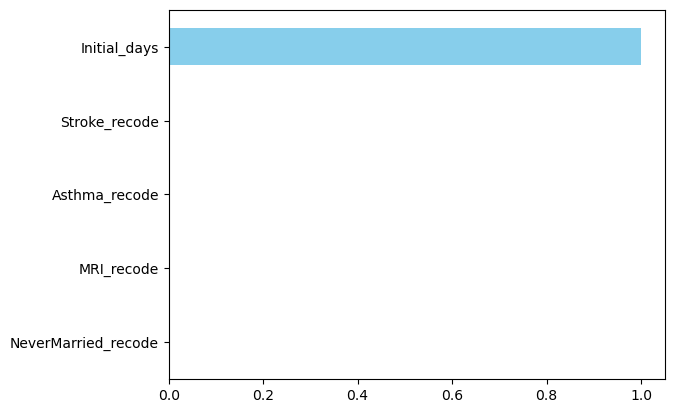

In [30]:
# feature importance
importances = (rf_medical.feature_importances_)
rf_importances = pd.Series(importances, index=X_train.columns)
rf_importances_sorted=rf_importances.sort_values()

rf_importances_sorted.plot(kind='barh',color='skyblue')
# only initial_days had any importance in training the model